<a href="https://colab.research.google.com/github/AryanSkywalker/AS-P1-Digit-Detection/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modulation**

In [ ]:
!pip install gtts

In [ ]:
import torch
from torch import nn as nn
from torch import optim as optim
from torch.nn import functional as F
from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets as Datasets
from torchvision import models as Models
from torchvision import transforms as Transforms
from torchvision.utils import make_grid

import os

import cv2 as cv
from matplotlib import pyplot as plt

import tqdm

import urllib

from six.moves import urllib    

import numpy as np

from google.colab.patches import cv2_imshow

In [ ]:
from gtts import gTTS

import IPython.display as display

# **Dataset**

In [ ]:
accelerator = torch.device('cuda:0')

In [ ]:
terraformer = Transforms.Compose([
                                  
                                  Transforms.PILToTensor()
                                  
                                  #Transforms.Normalize((0.1307, ), (0.3081, ))
                                  
])

In [ ]:
serraformer = Transforms.Compose([
                                  
                                  Transforms.Normalize((0.1307, ), (0.3081, ))

])

In [ ]:
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
trainingDataset = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=terraformer, train=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./Data/MNIST/raw/train-images-idx3-ubyte.gz to ./Data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./Data/MNIST/raw/train-labels-idx1-ubyte.gz to ./Data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./Data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./Data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
validationDataset = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=terraformer, train=False)

In [ ]:
print(len(trainingDataset), len(validationDataset))

60000 10000


# **Data Preprocessing**

In [ ]:
type(trainingDataset)

torchvision.datasets.mnist.MNIST

In [ ]:
batchSize = 1024

In [ ]:
trainLoader = DataLoader(trainingDataset, batchSize, True)
validationLoader = DataLoader(validationDataset, batchSize, False)

In [ ]:
images, labels = next(iter(trainLoader))
images.shape, labels.shape

(torch.Size([1024, 1, 28, 28]), torch.Size([1024]))

In [ ]:
labels

tensor([1, 7, 6,  ..., 1, 6, 0])

# **Visualization**

In [ ]:
def DisplayImage(image, title):

  print(title)
  cv2_imshow(image)

  """cv.imshow(title, image)

  while True:

    if cv.waitKey(0) == 13:

      break"""

In [ ]:
def DisplayBatch(loader):

  images, labels = next(iter(loader))
  images = serraformer(images.float())
  grid = make_grid(images).permute([1, 2, 0]).numpy()
  title = ' '.join([str(x) for x in labels.tolist()])

  DisplayImage(grid, title)

6 5 7 7 0 3 2 0 2 6 9 6 5 9 5 6 5 1 5 7 8 4 2 5 9 1 9 7 9 9 5 8 3 1 3 2 0 1 9 5 8 7 6 4 4 9 3 6 0 1 1 7 3 5 3 3 8 0 7 2 1 4 5 0 5 0 3 0 0 5 3 7 5 8 6 3 1 1 5 0 9 4 5 7 2 3 7 2 4 4 6 4 6 3 7 3 1 8 6 4 7 8 7 8 2 5 9 2 1 8 9 4 5 4 7 9 9 3 4 7 0 8 2 0 2 6 8 6 6 6 1 3 8 0 4 3 4 0 4 0 4 1 2 4 4 4 7 9 7 2 8 6 8 3 5 4 8 8 3 8 4 5 7 0 2 4 8 0 1 1 3 1 8 1 4 5 3 8 3 1 2 4 5 7 7 0 9 9 0 4 4 0 1 4 7 9 5 1 0 1 4 3 4 3 1 6 8 2 1 4 4 1 8 3 1 1 9 9 2 1 5 3 5 7 8 2 0 9 5 5 3 4 1 7 5 2 6 2 0 2 6 1 3 8 6 2 3 0 2 1 3 6 5 4 6 7 5 3 1 1 8 6 0 2 8 8 9 5 9 9 6 8 8 5 3 1 0 4 6 9 6 4 6 7 6 2 1 8 1 8 2 7 1 7 4 4 7 0 2 5 8 1 1 2 2 3 2 4 7 1 2 0 0 9 4 9 5 8 0 9 4 0 6 0 0 0 6 7 5 4 6 4 1 9 9 2 2 7 1 5 4 1 1 5 1 4 9 7 3 8 6 7 4 7 0 7 2 8 1 1 7 9 6 8 7 8 3 3 1 3 1 7 5 3 2 8 0 3 8 3 3 5 7 1 3 0 5 5 8 4 1 0 5 5 6 6 0 8 8 3 0 6 9 0 8 3 4 8 2 6 3 6 0 7 9 3 3 8 6 6 0 1 2 2 9 8 5 0 1 5 1 7 1 1 6 2 1 5 3 5 6 4 0 1 7 4 1 5 3 4 5 9 2 9 7 0 6 5 3 7 8 6 9 7 5 2 9 4 4 2 5 2 4 6 4 3 2 3 9 6 1 1 0 1 2 3 8 7 8 7 6 4 7 7 6 1 7 6 4 3 

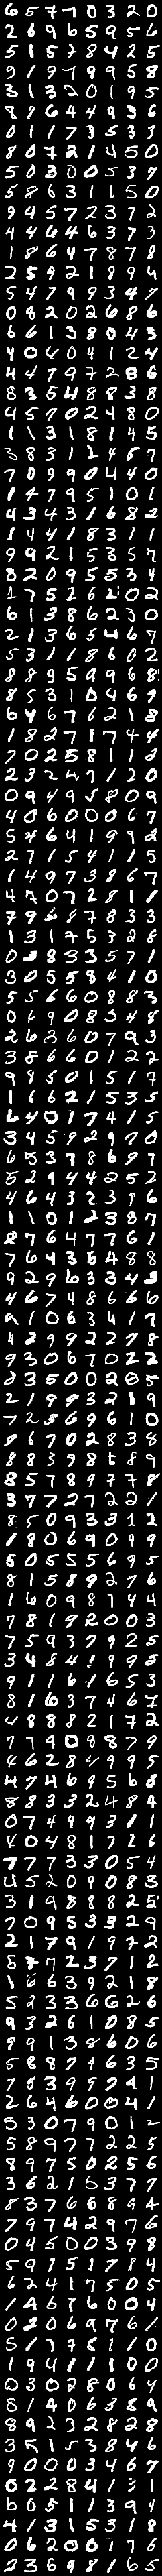

In [ ]:
DisplayBatch(trainLoader)

In [ ]:
cv.destroyAllWindows()

# **Eneritron**

In [ ]:
class Eneritron(nn.Module):

  def __init__(self, modelArchive):

    super(Eneritron, self).__init__()

    self.modelArchive = modelArchive

    self.ener = nn.Sequential(
        
                              nn.Conv2d(1, 16, 7),
                              nn.LeakyReLU(),
                              nn.Conv2d(16, 64, 7),
                              nn.LeakyReLU(),
                              nn.Conv2d(64, 64, 7),
                              nn.LeakyReLU(),
                              nn.AvgPool2d(3, 2, 1)

    )

    self.vate = nn.Sequential(
        
                              nn.Linear(1600, 784),
                              nn.LeakyReLU(),
                              nn.Linear(784, 784),
                              nn.LeakyReLU(),
                              nn.Linear(784, 784),
                              nn.LeakyReLU(),
                              nn.Linear(784, 10)

    )

  def forward(self, X):

    #print('Raw X Shape: ', X.shape)
    enerX = self.ener(X)
    #print('Ener X Shape: ', enerX.shape)
    flatX = enerX.view(enerX.shape[0], -1)
    #print(flatX.shape)
    enervateX = self.vate(flatX)
    #print('Enervate X Shape: ', enervateX.shape)

    return enervateX
    
  def Learn(self, Loader, Optimizer, LossFunction, epochs, TestLoader, displayGraph=True):

    accuracyTrArchive = []
    accuracyTArchive = []
    lossArchive = []

    minimumLoss = 10 ** 10
    minLossEpoch = -1

    for epoch in tqdm.notebook.tqdm(range(epochs), total=epochs, unit='Epoch(s)'):

      print('\n\n\n\nEpoch Iteration: ', epoch + 1)

      for X, Y in Loader:

        X, Y = X.to(accelerator), Y.to(accelerator)

        X = serraformer(X.float())

        Optimizer.zero_grad()

        yH = self.forward(X)

        loss = LossFunction(yH, Y)
        loss.backward(retain_graph=True)

        Optimizer.step()

        del X, Y

      trainAccuracy = self.Accurize(Loader)
      testAccuracy = self.Accurize(TestLoader)

      lossArchive.append(loss.item())
      accuracyTrArchive.append(trainAccuracy)
      accuracyTArchive.append(testAccuracy)

      if loss.item() <= minimumLoss:

        minimumLoss = loss.item()
        minLossEpoch = epoch

        torch.save(self.state_dict(), os.path.join(self.modelArchive, 'bestModel.pth'))

      self.SaveModel(epoch)

      print('Epoch Iteration: ', epoch + 1, '\t\tTrain Accuracy: ', trainAccuracy, '\tTest Accuracy: ', testAccuracy, '\t Current Loss: ', loss.item())

      torch.cuda.empty_cache()

    print('Analysing Results...\n\n')

    print('Final Loss: ', lossArchive[-1], '\tFinal Train Accuracy: ', accuracyTrArchive[-1], '\tTest Accuracy: ', accuracyTArchive[-1], '[', epoch + 1, ']')
    print('Minimum Loss: ', minimumLoss, '\tMinimum Loss\'s Accuracy: ', accuracyTrArchive[minLossEpoch], '\tTest Accuracy: ', accuracyTArchive[minLossEpoch], '[', minLossEpoch, ']')
    
    bestLossEpoch = accuracyTArchive.index(max(accuracyTArchive))

    print('Best Loss: ', lossArchive[bestLossEpoch], '\tBest Loss\'s Train Accuracy: ', accuracyTrArchive[bestLossEpoch], '\tTest Accuracy: ', accuracyTArchive[bestLossEpoch], '[', bestLossEpoch, ']')

    plt.plot(lossArchive)
    plt.title('Train Loss')
    plt.show()

    plt.plot(accuracyTrArchive)
    plt.title('Train Accuracy')

    plt.plot(accuracyTArchive)
    plt.title('Test Accuracy')
    plt.show()

  def Accurize(self, Loader):

    correct, total = 0, 0

    for X, Y in tqdm.notebook.tqdm(Loader, total=len(Loader), unit='\tSynchronizations'):

      X, Y = X.to(accelerator), Y.to(accelerator)
      X = serraformer(X.float())

      yH = self.forward(X)
      yHBinary = torch.argmax(yH, 1)

      total += X.shape[0]
      correct += (yHBinary == Y).sum().item()

    return correct / total * 100

  def Predict(self, X):

    X = X.to(accelerator)
    X = serraformer(X.float())

    yH = self.forward(X)
    predictions = torch.argmax(yH, 1)

    return predictions.item()

  def LoadModel(self, modelIdx):

    modelName = 'model_' + str(modelIdx) + '.pth'
    self.load_state_dict(torch.load(os.path.join(self.modelArchive, modelName)))

  def SaveModel(self, modelIdx):

    modelName = 'model_' + str(modelIdx) + '.pth'
    torch.save(self.state_dict(), os.path.join(self.modelArchive, modelName))

# **Learning**

In [ ]:
eneritron = Eneritron(os.path.join('.', 'Models'))

In [ ]:
eneritron.to(accelerator)

Eneritron(
  (ener): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(16, 64, kernel_size=(7, 7), stride=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(7, 7), stride=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): AvgPool2d(kernel_size=3, stride=2, padding=1)
  )
  (vate): Sequential(
    (0): Linear(in_features=1600, out_features=784, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=784, out_features=784, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=784, out_features=784, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [ ]:
learningRate = 0.0001
epochs = 10

In [ ]:
Optimizer = optim.Adam(eneritron.parameters(), learningRate)
lossFunction = nn.CrossEntropyLoss()





Epoch Iteration:  1



Epoch Iteration:  1 		Train Accuracy:  98.745 	Test Accuracy:  98.65 	 Current Loss:  0.017074091359972954




Epoch Iteration:  2



Epoch Iteration:  2 		Train Accuracy:  98.89666666666666 	Test Accuracy:  98.42 	 Current Loss:  0.13804402947425842




Epoch Iteration:  3



Epoch Iteration:  3 		Train Accuracy:  99.50166666666667 	Test Accuracy:  99.07000000000001 	 Current Loss:  0.02635413408279419




Epoch Iteration:  4



Epoch Iteration:  4 		Train Accuracy:  99.52166666666666 	Test Accuracy:  98.99 	 Current Loss:  0.04827147349715233




Epoch Iteration:  5



Epoch Iteration:  5 		Train Accuracy:  99.62833333333333 	Test Accuracy:  99.03 	 Current Loss:  0.028593624010682106




Epoch Iteration:  6



Epoch Iteration:  6 		Train Accuracy:  99.60666666666667 	Test Accuracy:  98.72 	 Current Loss:  0.0036939894780516624




Epoch Iteration:  7



Epoch Iteration:  7 		Train Accuracy:  99.68333333333334 	Test Accuracy:  99.00999999999999 	 Current Loss:  0.0051027019508183




Epoch Iteration:  8



Epoch Iteration:  8 		Train Accuracy:  99.57333333333334 	Test Accuracy:  98.92 	 Current Loss:  0.02138303965330124




Epoch Iteration:  9



Epoch Iteration:  9 		Train Accuracy:  99.63499999999999 	Test Accuracy:  98.8 	 Current Loss:  0.0010541597148403525




Epoch Iteration:  10



Epoch Iteration:  10 		Train Accuracy:  99.71666666666667 	Test Accuracy:  98.98 	 Current Loss:  0.004801006987690926

Analysing Results...


Final Loss:  0.004801006987690926 	Final Train Accuracy:  99.71666666666667 	Test Accuracy:  98.98 [ 10 ]
Minimum Loss:  0.0010541597148403525 	Minimum Loss's Accuracy:  99.63499999999999 	Test Accuracy:  98.8 [ 8 ]
Best Loss:  0.02635413408279419 	Best Loss's Train Accuracy:  99.50166666666667 	Test Accuracy:  99.07000000000001 [ 2 ]


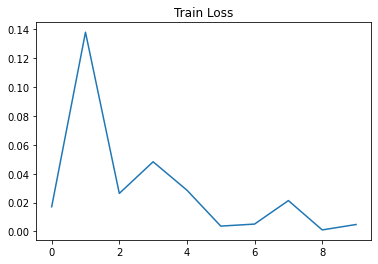

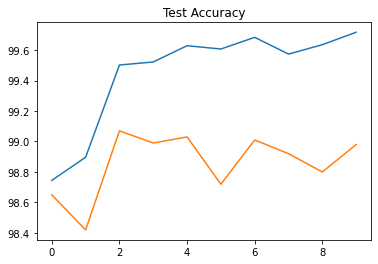

In [ ]:
eneritron.Learn(trainLoader, Optimizer, lossFunction, epochs, validationLoader, True)

In [ ]:
eneritron.load_state_dict(torch.load(os.path.join('.', 'Models', 'model_2.pth')))

<All keys matched successfully>

In [ ]:
eneritron.Accurize(trainLoader)

99.50166666666667

# **Testing**

In [ ]:
testImage = cv.imread('Test.png', cv.IMREAD_GRAYSCALE)
processedTestImage = (torch.unsqueeze(torch.tensor(testImage), 0).permute([1, 2, 0])).numpy()

print(type(processedTestImage), processedTestImage.shape)

DisplayImage(processedTestImage, 'Test Image')

RuntimeError: ignored

In [ ]:
cv.destroyAllWindows()

In [ ]:
torchTestImage = torch.unsqueeze(torch.tensor(testImage), 0)

In [ ]:
torch.unsqueeze(torchTestImage, 0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
eneritron.Predict(torch.unsqueeze(torchTestImage, 0))

0

# **Energon**

In [ ]:
expression = cv.imread('Alpha 2A.png', cv.IMREAD_GRAYSCALE)

DisplayImage(expression, 'Expression')

Expression


In [ ]:
cv.destroyAllWindows()

In [ ]:
def AddLines(expression):

  counter = 0

  for i in range(expression.shape[1]):

    counter += 1

    if counter == 29:

      counter = 0

      expression[:, i] = np.ones((28)) * 255

  return expression

In [ ]:
paddedExpression = AddLines(expression)
cv.imwrite('Alpha 2B.png', paddedExpression)

True

In [ ]:
renderedExpression = cv.imread('Alpha 1B.png', cv.IMREAD_GRAYSCALE)

In [ ]:
DisplayImage(renderedExpression, 'Rendered Expression')

Rendered Expression


In [ ]:
cv.destroyAllWindows()

In [ ]:
renderedExpression.shape

(28, 260)

In [ ]:
def ReadExpression(expression, dictator, network):

  leveller = -1
  difiance = False
  seer = expression.shape[0]
  translatedExpression = []
  m = False

  for i in range(len(dictator)):

    leveller += 1

    decider = seer * i + leveller
    extract = torch.tensor(torch.unsqueeze(torch.unsqueeze(torch.tensor(expression[:, decider:(decider + seer)]), 0), 0))
    print(extract.shape)
    extract = serraformer(extract.float())

    prediction = str(network.Predict(extract)) if dictator[i] == 'N' else dictator[i]

    DisplayImage(expression[:, decider:(decider + seer)], 'Render')
    cv.destroyAllWindows()     

    if (i == 0  or dictator[i] in ['+', '-', '*', '/'])and m == False:

      m = True

      if dictator[i] in ['+', '-', '*', '/']: 
        
        translatedExpression.append(prediction)
        continue

    if m == True and prediction not in ['+', '-', '*', '/'] and int(prediction) in list(range(1, 10)):

      m = False

    if m == False: translatedExpression.append(prediction)


  print(''.join(translatedExpression), ': ', eval(''.join(translatedExpression)))
  interpretedExpression = ''.join(translatedExpression)

  prompt = gTTS(((interpretedExpression + 'equals' + str(eval(interpretedExpression))).replace('-', 'minus')).replace('*', 'times'))
  prompt.save('Prompt.mp3')
  prompt = display.Audio('Prompt.mp3', autoplay=True)

  display.display(prompt)

  return ''.join(translatedExpression)


In [ ]:
writtenExpression = cv.imread(os.path.join('.', 'Alpha 3C.png'), cv.IMREAD_GRAYSCALE)

In [ ]:
DisplayImage(writtenExpression, 'Written Expression')

Written Expression


In [ ]:
print(writtenExpression.shape)

(28, 260)


In [ ]:
ReadExpression(writtenExpression, 'NNNN+NNNN', Canary)


torch.Size([1, 1, 28, 28])
Render


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


torch.Size([1, 1, 28, 28])
Render


torch.Size([1, 1, 28, 28])
Render


torch.Size([1, 1, 28, 28])
Render


torch.Size([1, 1, 28, 28])
Render


torch.Size([1, 1, 28, 28])
Render


torch.Size([1, 1, 28, 28])
Render


torch.Size([1, 1, 28, 28])
Render


torch.Size([1, 1, 28, 28])
Render


5239+2967 :  8206


'5239+2967'

In [ ]:
prompt = gTTS((interpretedExpression + 'equals' + str(eval(interpretedExpression))).replace('-', 'minus'))
prompt.save('Prompt.mp3')
prompt = display.Audio('Prompt.mp3', autoplay=True)

display.display(prompt)

# **Canary**

In [ ]:
canaryTransformer1 = Transforms.Compose([
                                        
                    Transforms.GaussianBlur(3, 0.5),
                    Transforms.PILToTensor()

])

canaryTransformer2 = Transforms.Compose([
                                        
                    Transforms.GaussianBlur(1, 0.75),
                    Transforms.PILToTensor()

])

canaryTransformer3 = Transforms.Compose([
                                        
                    Transforms.RandomRotation(60),
                    Transforms.PILToTensor()

])

canaryTransformer4 = Transforms.Compose([
                                         
                    Transforms.RandomResizedCrop(28, (0.6, 1.0), (1.0, 1.0)),
                    Transforms.PILToTensor()

])

canaryTransformer5 = Transforms.Compose([
                                         
                    Transforms.RandomAffine(60, (0.15, 0.15)),
                    Transforms.PILToTensor()

])

canaryTransformer6 = Transforms.Compose([
                                         
                    Transforms.Pad(5),
                    Transforms.Resize(28),
                    Transforms.PILToTensor()

])

canaryTransformer7 = Transforms.Compose([
                                         
                    Transforms.Pad(5),
                    Transforms.Resize(28),
                    Transforms.RandomAffine(0, (0.25, 0.25)),
                    Transforms.PILToTensor()

])

canaryTransformer8 = Transforms.Compose([
                                         
                    Transforms.Pad(10),
                    Transforms.Resize(28),
                    Transforms.RandomAffine(45, (0.35, 0.35)),
                    Transforms.PILToTensor()

])

canaryTransformer9 = Transforms.Compose([
                                         
                    Transforms.RandomAffine(60, (0.15, 0.15)),
                    Transforms.GaussianBlur(3, 0.5),
                    Transforms.PILToTensor()

])

canarySerraformer = Transforms.Compose([
                                        
                    Transforms.Normalize((0.1307, ), (0.3081, ))

])



In [ ]:
batchSize = 1024

In [ ]:
canarySet1 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer1, train=True)

In [ ]:
canary1 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer1, train=False)

In [ ]:
canarySet2 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=terraformer, train=True)

In [ ]:
canary2 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=terraformer, train=False)

In [ ]:
canarySet3 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer2, train=True)

In [ ]:
canary3 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer2, train=False)

In [ ]:
canarySet4 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer3, train=True)

In [ ]:
canary4 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer3, train=False)

In [ ]:
canarySet5 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer4, train=True)
canary5 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer4, train=False)

In [ ]:
canarySet6 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer5, train=True)
canary6 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer5, train=False)

In [ ]:
canarySet7 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer6, train=True)
canary7 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer6, train=False)

In [ ]:
canarySet8 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer7, train=True)
canary8 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer7, train=False)

In [ ]:
canarySet9 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer8, train=True)
canary9 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer8, train=False)

In [ ]:
canarySet10 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer9, train=True)
canary10 = Datasets.MNIST(os.path.join('.', 'Data'), download=True, transform=canaryTransformer9, train=False)

In [ ]:
canarySet = torch.utils.data.ConcatDataset([canarySet1, canarySet2, canarySet3, canarySet4, canarySet5, canarySet6, canarySet7, canarySet8, canarySet9, canarySet10])

In [ ]:
canaryTestset = torch.utils.data.ConcatDataset([canary1, canary2, canary3, canary4, canary5, canary6, canary7, canary8, canary9, canary10])

In [ ]:
print('Training Set Length: ', len(canarySet))
print('Testing Set Length: ', len(canaryTestset))

Training Set Length:  600000
Testing Set Length:  100000


In [ ]:
trainLoader = DataLoader(canarySet, batchSize, True)

In [ ]:
testLoader = DataLoader(canaryTestset, batchSize, False)

4 1 9 9 9 1 9 5 6 4 1 4 3 8 9 4 7 1 7 8 9 9 8 7 7 1 4 1 3 3 6 1 8 4 3 2 8 2 9 6 0 3 7 0 2 3 9 2 6 3 2 4 1 3 3 0 4 3 1 1 1 7 4 6 7 3 9 9 1 8 6 1 5 5 6 4 9 2 1 7 8 5 2 2 0 1 7 3 1 7 8 3 3 4 8 4 6 4 6 4 9 9 1 2 1 5 2 7 2 4 3 0 4 1 7 8 6 3 0 9 6 7 4 4 4 9 9 2 1 2 4 2 3 8 2 6 3 1 7 0 0 6 3 0 8 3 0 0 8 1 9 3 7 1 1 1 3 5 6 0 3 4 1 7 2 2 3 4 0 3 3 7 4 3 7 3 2 4 4 3 6 3 4 5 3 8 9 9 3 2 1 8 9 4 3 8 6 7 4 7 2 8 0 7 6 3 7 6 7 6 2 9 7 9 3 3 0 3 4 7 6 4 5 0 8 6 2 1 5 3 4 5 2 7 7 1 8 5 5 6 9 0 7 3 3 4 5 1 1 7 6 0 9 8 1 5 7 5 0 2 3 6 8 7 1 0 6 0 2 4 7 1 2 3 3 6 0 5 7 4 5 7 6 2 2 1 8 4 3 1 0 9 9 9 4 7 7 7 4 9 2 6 5 9 3 6 9 1 1 4 3 6 4 9 1 8 3 0 9 4 1 4 8 6 6 0 1 2 5 7 1 7 9 4 4 8 3 9 6 8 7 0 9 4 2 3 1 4 8 2 9 8 7 3 8 9 2 1 1 1 1 0 6 8 1 5 5 2 5 9 2 7 3 9 5 8 1 7 3 8 7 6 8 7 4 6 5 1 9 0 6 5 9 3 7 3 1 5 0 0 5 3 8 2 5 3 6 9 8 7 8 2 3 5 3 7 0 4 2 9 3 7 1 8 9 1 4 8 6 2 7 1 7 8 8 1 0 0 8 1 9 4 3 5 1 6 9 8 5 3 0 3 3 6 1 2 0 8 4 3 9 2 7 4 8 8 4 8 4 7 7 8 8 8 4 2 3 1 0 1 7 1 2 8 0 6 8 6 6 2 0 5 4 8 1 4 6 9 2 1 

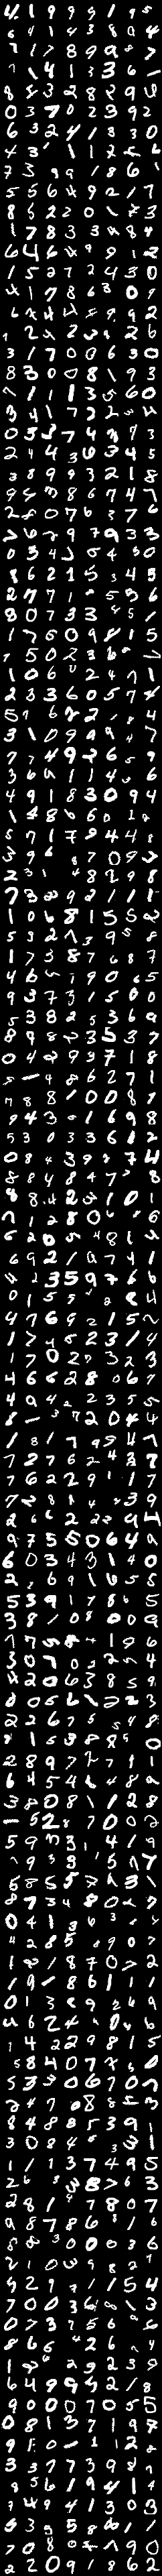

In [ ]:
DisplayBatch(trainLoader)

In [ ]:
Canary = Eneritron(os.path.join('.', 'Models'))

In [ ]:
Canary.to(accelerator)

Eneritron(
  (ener): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(16, 64, kernel_size=(7, 7), stride=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(7, 7), stride=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): AvgPool2d(kernel_size=3, stride=2, padding=1)
  )
  (vate): Sequential(
    (0): Linear(in_features=1600, out_features=784, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=784, out_features=784, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=784, out_features=784, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [ ]:
learningRate = 0.0002
epochs = 5

In [ ]:
Optimizer = optim.Adam(Canary.parameters(), learningRate)
lossFunction = nn.CrossEntropyLoss()





Epoch Iteration:  1



Epoch Iteration:  1 		Train Accuracy:  97.41018518518518 	Test Accuracy:  97.32111111111111 	 Current Loss:  0.05538749322295189




Epoch Iteration:  2



Epoch Iteration:  2 		Train Accuracy:  97.56074074074074 	Test Accuracy:  97.34333333333333 	 Current Loss:  0.1017976924777031




Epoch Iteration:  3



Epoch Iteration:  3 		Train Accuracy:  97.61444444444444 	Test Accuracy:  97.40333333333334 	 Current Loss:  0.08218587189912796




Epoch Iteration:  4



Epoch Iteration:  4 		Train Accuracy:  97.76925925925926 	Test Accuracy:  97.57444444444444 	 Current Loss:  0.10616619884967804




Epoch Iteration:  5



Epoch Iteration:  5 		Train Accuracy:  97.77851851851852 	Test Accuracy:  97.52777777777779 	 Current Loss:  0.05251321941614151

Analysing Results...


Final Loss:  0.05251321941614151 	Final Train Accuracy:  97.77851851851852 	Test Accuracy:  97.52777777777779 [ 5 ]
Minimum Loss:  0.05251321941614151 	Minimum Loss's Accuracy:  97.77851851851852 	Test Accuracy:  97.52777777777779 [ 4 ]
Best Loss:  0.10616619884967804 	Best Loss's Train Accuracy:  97.76925925925926 	Test Accuracy:  97.57444444444444 [ 3 ]


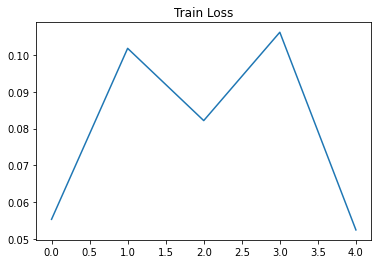

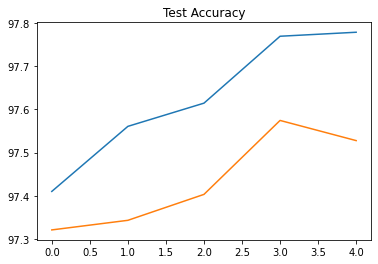

In [ ]:
Canary.Learn(trainLoader, Optimizer, lossFunction, epochs, testLoader, True)

In [ ]:
Canary.load_state_dict(torch.load(os.path.join('.', 'Models', 'RE TM1.pth')))

<All keys matched successfully>

In [ ]:
print('Train Accuracy: ', Canary.Accurize(trainLoader))
print('Test Accuracy: ', Canary.Accurize(testLoader))


Train Accuracy:  97.65033333333332



Test Accuracy:  97.38799999999999
